# Medical Imaging Task

### Problem Statement: 
Generate a dataset of 400 2-dimensional data vectors which consists of four groups of 100 data vectors. The four groups are modeled by Gaussian distributions with **means**:  
$m_1 = [0,0]^T$ , $m_2 = [4,0]^T$, $m_3 = [0,4]^T$, $m_4 = [5,4]^T$  
and **covariance matrices**:  
$S_1 = I$, $S_2 = \begin{bmatrix}1 & 0.2 \\ 0.2 & 1.5\end{bmatrix}$, $S_3 = \begin{bmatrix}1 & 0.4 \\ 0.4 & 1.1\end{bmatrix}$, $S_4 = \begin{bmatrix}0.3 & 0.2 \\ 0.2 & 1.5\end{bmatrix}$ respectively.  
Plot the data vectors. Measures the Euclidean distance between any two data points and determine **maximum** ($d_{max}$) and **minimum** ($d_{min}$) Euclidean distances.

---
### Part 1 - Importing libraries  and generating random vectors
We start by importing our required packages and initializing the data given in the question

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.spatial import distance
import time

data = []
density_map = []

SETS = 4

POINTS = 100

MEAN = [[0,0],[4,0],[0,4],[5,4]]

COV =  [[[1  ,0  ], [0  ,1  ]], 
        [[1  ,0.2], [0.2,1.5]], 
        [[1  ,0.4], [0.4,1.1]], 
        [[0.3,0.2], [0.2,0.5]]]

# Range of viewport
XO, YO = -3, 8

Now, since we have multiple sets to plot are, we run the for loop over the data we initialized in Part 1. We will use a specific seed in order to keep the randomly generated vectors same.  
The ```vectors``` is an array of randomly generated vectors from the Multivariate Gaussian Distribution which is given by the equation: 
$$f\mathrm{(X_1, X_2, ..., X_n)} = \dfrac{1}{(2\pi)^\frac{n}{2}|\Sigma|^\frac{1}{2}}.\mathrm{exp}\left[-\dfrac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu)\right]$$
here, $n=2$, $\Sigma$ is the **covariance matrix** and $|\Sigma|$ is the **determinant** of covariance matrix.


In [72]:
for i in range(SETS):
  # np.random.seed(42)
  vectors = np.random.multivariate_normal(mean=MEAN[i], cov=COV[i], size=POINTS)
  data.append([vectors])
data = np.array(data)

### Part 2 - 2D Contour and Sccatter Plot
To create the 2D scatter & contour plots, we initialize the figure and the it's axes.  
We prepare a grid mesh for the indivisual contour plots. The grid mesh is evenly placed points between the viewport range initialized in Part 1. If the range is too small, the plot may be cut off and if it's too large, plot would be too small to visualise.

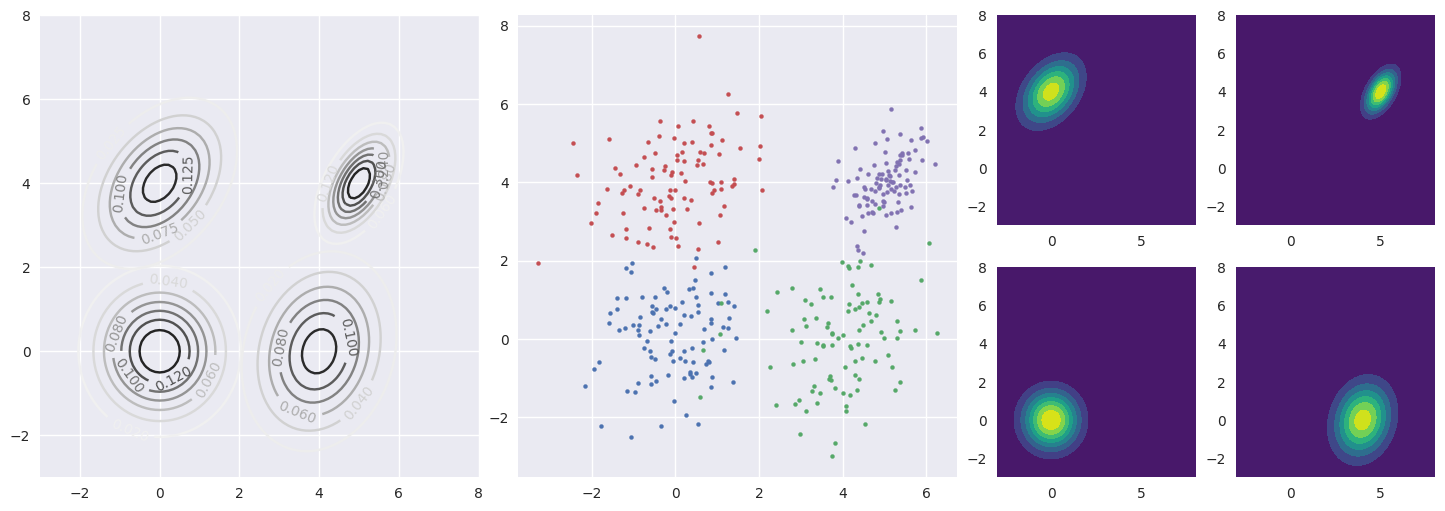

In [73]:
fig0, ax = plt.subplots(figsize=(18,6))
axis_contour = plt.subplot2grid(shape=(2,6), loc=(0,0), rowspan=2, colspan=2)
axis_scatter = plt.subplot2grid(shape=(2,6), loc=(0,2), rowspan=2, colspan=2)
ax2D1 = plt.subplot2grid(shape=(2,6), loc=(1,4))
ax2D2 = plt.subplot2grid(shape=(2,6), loc=(1,5))
ax2D3 = plt.subplot2grid(shape=(2,6), loc=(0,4))
ax2D4 = plt.subplot2grid(shape=(2,6), loc=(0,5))
plt.style.use("seaborn")
# plt.style.use("ggplot")
xx, yy = np.meshgrid(*np.linspace(XO,YO,POINTS)[np.newaxis,...].repeat(2,0))
# gridspace.shape is (100,100)
gridspace = np.array([xx,yy]).transpose((1,2,0)).reshape(-1,2)

for i in range(SETS):
  z = multivariate_normal.pdf(gridspace, mean=MEAN[i], cov=COV[i])
  # print("z:\n\n", z)
  z = z.reshape(POINTS,POINTS)
  density_map.append(z)

  cs = axis_contour.contour(xx,yy,z)
  plt.clabel(cs)
  axis_scatter.scatter(*data[i].T, s=8)

plt.style.use("default")
density_map = np.array(density_map)
data = np.array(data)
ax2D1.contourf(xx, yy, density_map[0])
ax2D2.contourf(xx, yy, density_map[1])
ax2D3.contourf(xx, yy, density_map[2])
ax2D4.contourf(xx, yy, density_map[3])

### Part 3 - 3D Scatter Plot


We can plot a 3D Scatter too by using x and y as the co-ordinates of the vector and z as the density returned from probablity distribution function. 

Text(0.5, 0, 'Gaussian Probablity Density')

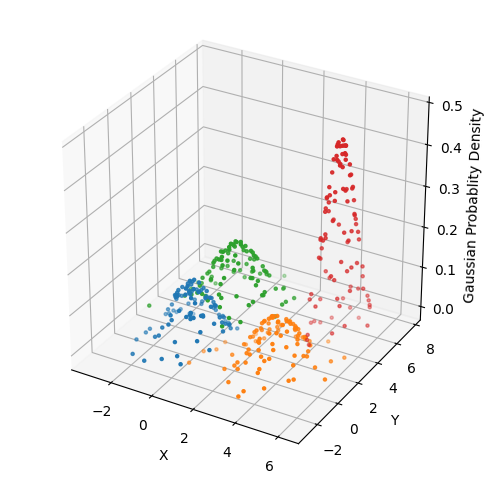

In [74]:
plt.style.use("default")
fig3d = plt.figure(figsize=(6,6))
ax3D = fig3d.add_subplot(111, projection='3d')
for i in range(SETS):
  x_,y_ = data[i].T
  z_ = multivariate_normal.pdf(data[i], mean=MEAN[i], cov=COV[i])
  ax3D.scatter(x_, y_, z_, marker='o', s=5)

ax3D.set_xlabel('X')
ax3D.set_ylabel('Y')
ax3D.set_zlabel('Gaussian Probablity Density')


# Finding Maximum and Minimum distance
Defined below is a function ```min_max_euclid()``` to calculate the minimum and maximum euclidean distance between two points of a dataset  
Euclidean distance between two points is given by: $$d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$$ here, $n$ is the number of dimensions.  
So, for our problem $n=2 \Longrightarrow \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $

In [75]:
def min_max_euclid(dataset):
  start_time = time.time()
  distances = distance.cdist(dataset,dataset,metric='euclidean')
  minvals = []
  val = []
  for row in distances:
    val.append(np.max(row))
    minvals.append(np.partition(row,1)[1])

  valuemax = np.amax(distances)
  valuemin = np.min(np.array(minvals))

  print("\n--- %s seconds for computation --- " % (time.time() - start_time))
  return (valuemax, np.where(distances == valuemax)[0], valuemin, np.where(distances == valuemin)[0])

Below is the commented out code what my initial implementation was for finding euclidean distance from a dataset. But it turns out using for loops of $O(n^2)$ complexity slows down the performance and it's recommended to use a library function.

In [ ]:
# def euclidean_distance(i,j):
#   return ((j[0] - i[0])**2 + (j[1] - i[1])**2)**(1/2)


# def min_max_distance(dataset):
#   start_time = time.time()
#   max_d = float("-inf")
#   min_d = float("inf")
#   max_between = []
#   min_between = []
#   for i in dataset:
#     for j in dataset:
#       if (i[0] == j[0] and i[1] == j[1]): continue
#       dist = euclidean_distance(i, j)

#       if dist > max_d:
#         max_d = dist
#         max_between = [i,j]

#       if dist < min_d:
#         min_d = dist
#         min_between = [i,j]

#   max_between = np.array(max_between)
#   min_between = np.array(min_between)
#   print("\n--- %s seconds for computation ---" % (time.time() - start_time))
#   return max_d, max_between, min_d, min_between


--- 0.005492687225341797 seconds for computation --- 

Maximum: 11.187476971805555 
>> Between [ 3.74973509 -2.99339503] and [0.55704926 7.72884345]

Minimum: 0.0166277593863798 
>> Between [4.39044276 3.40338535] and [4.39365749 3.41969939]



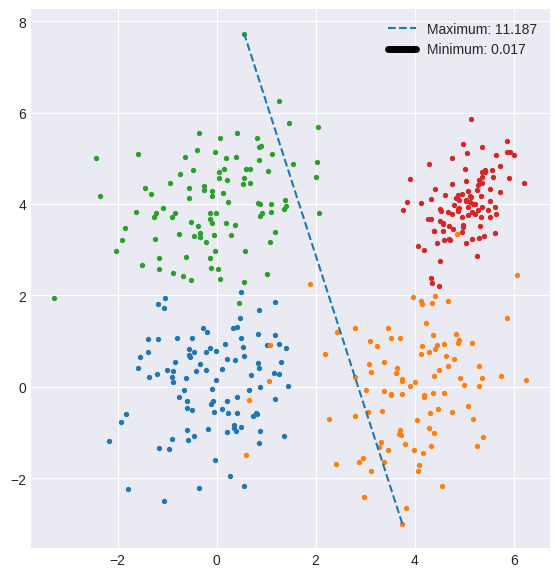

In [76]:
plt.style.use('seaborn-darkgrid')
fig1, ax1 = plt.subplots(figsize=(14,7))
ax2D0 = plt.subplot2grid(shape=(2,4), loc=(0,0), rowspan=2, colspan=2)

for i in range(SETS):
  ax2D0.scatter(*data[i].T, s=8)

# Minimum and Maximum Plot
maximum, idmax, minimum, idmin = min_max_euclid(data.reshape(-1,2))
max_between = np.array([data.reshape(-1,2)[idmax[0]], data.reshape(-1,2)[idmax[1]]])
min_between = np.array([data.reshape(-1,2)[idmin[1]], data.reshape(-1,2)[idmin[1]]])
print(f"\nMaximum: {maximum} \n>> Between {data.reshape(-1,2)[idmax[0]]} and {data.reshape(-1,2)[idmax[1]]}\n")
print(f"Minimum: {minimum} \n>> Between {data.reshape(-1,2)[idmin[0]]} and {data.reshape(-1,2)[idmin[1]]}\n")

x_max = [max_between[0,0], max_between[1,0]]
y_min = [max_between[0,1], max_between[1,1]]
ax2D0.plot(x_max, y_min, linestyle="dashed", label="Maximum: {:.3f}".format(maximum))
x_min = [min_between[0,0], min_between[1,0]]
y_min = [min_between[0,1], min_between[1,1]]
ax2D0.plot(x_min, y_min, lw=5, c="black", label="Minimum: {:.3f}".format(minimum))
ax2D0.legend()